In [6]:
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler



In [2]:
Down_traffic = pd.read_parquet("./Data/Down_traffic.parq")
Up_traffic = pd.read_parquet("./Data/Up_traffic.parq")

I'll choose the operator A to see the impact of the RSRP improvment on the uplink traffice and the downlink traffic. I'll also choose a random polygon

In [7]:
Down_traffic_poly = sqldf(
"""SELECT *
FROM Down_traffic
WHERE LocationLongitude BETWEEN 46.8 and 47
AND LocationLatitude BETWEEN 24.4 and 24.6
AND RadioOperatorName = 'Operator A'
;
""", globals())

Up_traffic_poly = sqldf(
"""SELECT *
FROM Up_traffic
WHERE LocationLongitude BETWEEN 46.8 and 47
AND LocationLatitude BETWEEN 24.4 and 24.6
AND RadioOperatorName = 'Operator A'
;
""", globals())

In [8]:
scaler = MinMaxScaler()
Down_traffic_poly[['RSRP', 'TrafficVolume']] = scaler.fit_transform(Down_traffic_poly[['RSRP', 'TrafficVolume']])
scaler = MinMaxScaler()
Up_traffic_poly[['RSRP', 'TrafficVolume']] = scaler.fit_transform(Up_traffic_poly[['RSRP', 'TrafficVolume']])

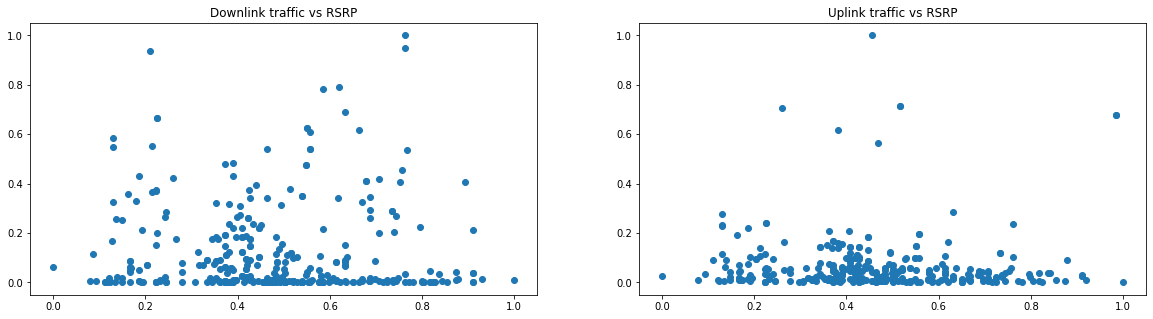

In [31]:
fig,(ax1,ax2) = plt.subplots(1, 2)
ax1.scatter(Down_traffic_poly.RSRP, Down_traffic_poly.TrafficVolume)
ax1.set_title("Downlink traffic vs RSRP")
ax2.scatter(Up_traffic_poly.RSRP, Up_traffic_poly.TrafficVolume)
ax2.set_title("Uplink traffic vs RSRP")
fig.set_figwidth(20)
fig.set_figheight(5) 
plt.show()

In [33]:
Down_traffic.corr(numeric_only=True)

,LocationLatitude,LocationLongitude,TrafficVolume,RSRP
LocationLatitude,1.000000,0.079795,-0.036160,0.098871
LocationLongitude,0.079795,1.000000,-0.026454,-0.042231
TrafficVolume,-0.036160,-0.026454,1.000000,-0.006594
RSRP,0.098871,-0.042231,-0.006594,1.000000


From the graph and the correlation matrix we can see that there's very little correlation between these variable. However, let's try a linear regression model and see how it performs then let's try other algorithms.